<a href="https://colab.research.google.com/github/tanvir362/SensorTranslation/blob/master/SensorTranslationDataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
cpath = "/content/drive/My Drive/Colab Notebooks/SensorTranslation/"

data = pd.read_csv(cpath+"S_T_Data.csv", index_col=False)
data.head()

,Temperature,DewPoint,WindSpeed,Pressure,Humidity
0,47,46,0,29.27,0.95
1,47,46,0,29.26,0.95
2,47,46,0,29.31,0.95
3,64,52,0,29.33,0.64
4,70,52,0,29.26,0.54


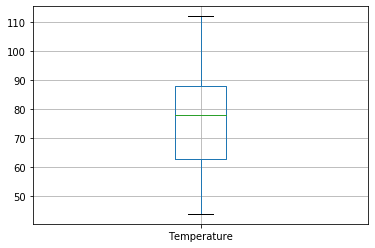

In [0]:
data[['Temperature']].boxplot()

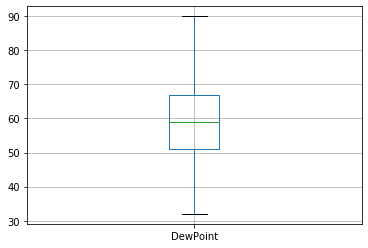

In [0]:
data[['DewPoint']].boxplot()

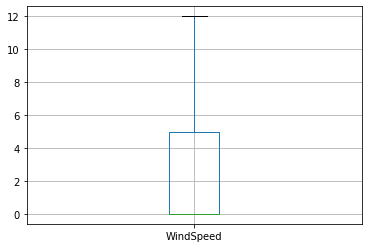

In [0]:
data[['WindSpeed']].boxplot()

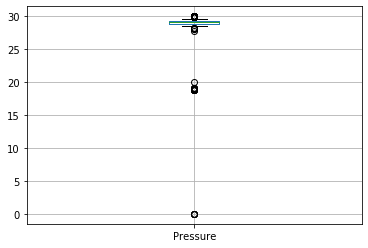

In [0]:
data[['Pressure']].boxplot()

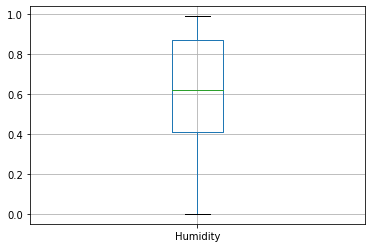

In [0]:
data[['Humidity']].boxplot()

In [0]:
for i in data.columns:
    print("{}:".format(i))
    print("\tMax: {}".format(data[i].max()))
    print("\tMin: {}".format(data[i].min()))
    print("\tMean: {}".format(data[i].mean()))
    print("\tMedian: {}".format(data[i].median()))
    print("\t50th percentile: {}".format(np.percentile(data[i],50)))
    print("\tStandard deviation: {}".format(data[i].std()))

Temperature:
	Max: 112
	Min: 44
	Mean: 76.0371155885472
	Median: 78.0
	50th percentile: 78.0
	Standard deviation: 16.67303612539185
DewPoint:
	Max: 90
	Min: 32
	Mean: 60.06309650053022
	Median: 59.0
	50th percentile: 59.0
	Standard deviation: 10.282727179987665
WindSpeed:
	Max: 12
	Min: 0
	Mean: 2.4273594909862144
	Median: 0.0
	50th percentile: 0.0
	Standard deviation: 3.352464412845825
Pressure:
	Max: 29.99
	Min: 0.0
	Mean: 28.906763925729454
	Median: 29.06
	50th percentile: nan
	Standard deviation: 1.7406192707860324
Humidity:
	Max: 0.99
	Min: 0.0
	Mean: 0.6201166489925792
	Median: 0.62
	50th percentile: 0.62
	Standard deviation: 0.2556068083936732


In [0]:
columns = ['Temperature', 'DewPoint', 'WindSpeed', 'Pressure', 'Humidity']
#Removing Outlier final
print("Before dropping:")
for i in columns:
    print("{}  size  {}".format(i, len(data[i])))

indxtclr = set()
for i in columns:
    p25 = np.percentile(data[i],25)
    p75 = np.percentile(data[i],75)
    iqr = p75 - p25
    i1 = p25 - 1.5*iqr
    i2 = p75 + 1.5*iqr

    indx = 0
    for j in data[i]:
        if j<i1 or j>i2:
            indxtclr.add(indx)
        indx = indx + 1

indxtclr = list(indxtclr)
try:
    data.drop(indxtclr, inplace=True)
except Exception as e:
    print(str(e))

print("After dropping:")
for i in columns:
    print("{}  size  {}".format(i, len(data[i])))

Before dropping:
Temperature  size  1886
DewPoint  size  1886
WindSpeed  size  1886
Pressure  size  1886
Humidity  size  1886
After dropping:
Temperature  size  1886
DewPoint  size  1886
WindSpeed  size  1886
Pressure  size  1886
Humidity  size  1886


In [0]:
itc = data.index[data['Pressure'] > 2500].tolist()
print(itc)
#data.drop(itc, inplace=True)

[]


In [0]:
data.to_csv(path_or_buf=cpath+"S_T_Final_data.csv", index=False)
data.head()

,Temperature,DewPoint,WindSpeed,Pressure,Humidity
0,47,46,0,29.27,0.95
1,47,46,0,29.26,0.95
2,47,46,0,29.31,0.95
3,64,52,0,29.33,0.64
4,70,52,0,29.26,0.54
